# CytB Molecular Clock

En este cuaderno se prueba el uso de las funciones desarrolladas para la comparación de secuencias de igual y distinta longitud sin hacer uso de las librerías específicas para ello. Se utilizan como ejemplo distintas secuencias en aves para el gen del citocromo b. El CytB está codificado únicamente por el DNA mitocondrial y es el gen más ampliamente usado en trabajos de filogenética 

In [2]:
import pandas as pd
from Bio import SeqIO
import numpy as np
from tsp_solver.greedy import solve_tsp
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import MolecularClock 

Se descargaron las secuencias para este gen en formato fasta (contenidas en el archivo cytb_Birds.fasta). Se genera un dataframe a partir de la información contenida en el archivo. 

In [5]:
df=MolecularClock.FromFASTAtoDataFrame("cytb_Birds.fasta")
display(df.head())

,ID,length,sequence,nombre
0,AY383121.1,1143,"(A, T, G, G, C, C, C, T, C, A, A, T, C, T, T, ...",Tangara dowii
1,EU585628.1,1045,"(C, T, T, C, G, G, C, T, C, C, C, T, T, C, T, ...",Branta bernicla
2,EF530019.1,1143,"(A, T, G, G, C, C, C, T, C, A, A, T, C, T, T, ...",Saltator atriceps
3,AY968887.1,1143,"(A, T, G, G, C, C, C, C, C, A, A, T, C, T, T, ...",Myioborus torquatus
4,DQ196549.1,1143,"(A, T, G, G, C, C, C, C, A, A, A, C, C, C, A, ...",Lampornis castaneoventris


Generamos matriz que contiene las distancias entre las distintas secuencias, es decir, el mínimo número de sustituciones, inserciones o deleciones que hay que realizar para que ambas secuencias sean iguales. Para ello se utilizan dos algoritmos, que calculan respectivamente la distancia de Levenshtein (mínimo número de sustituciones, adiciones o deleciones para que sean iguales) y la de distancia de Hamming (mínimo número de sustituciones para que dos secuencias de idéntica longitud sean iguales).

In [6]:
matriz=MolecularClock.matrizDistancias(df)
dfm = pd.DataFrame(matriz, columns=df.nombre, index=df.nombre)
display(dfm)

nombre,Tangara dowii,Branta bernicla,Saltator atriceps,Myioborus torquatus,Lampornis castaneoventris,Sturnella magna,Icterus pectoralis,Rissa tridactyla,Sasia abnormis
nombre,,,,,,,,,
Tangara dowii,0,295,124,140,222,214,719,249,314
Branta bernicla,295,0,287,287,264,340,636,275,224
Saltator atriceps,124,287,0,150,226,200,719,244,325
Myioborus torquatus,140,287,150,0,220,213,721,229,325
Lampornis castaneoventris,222,264,226,220,0,281,729,197,294
Sturnella magna,214,340,200,213,281,0,780,287,378
Icterus pectoralis,719,636,719,721,729,780,0,726,618
Rissa tridactyla,249,275,244,229,197,287,726,0,296
Sasia abnormis,314,224,325,325,294,378,618,296,0


Hacemos uso de una librería de R para representar esta matriz de distancias de forma adecuada. 

In [7]:
%load_ext rpy2.ipython


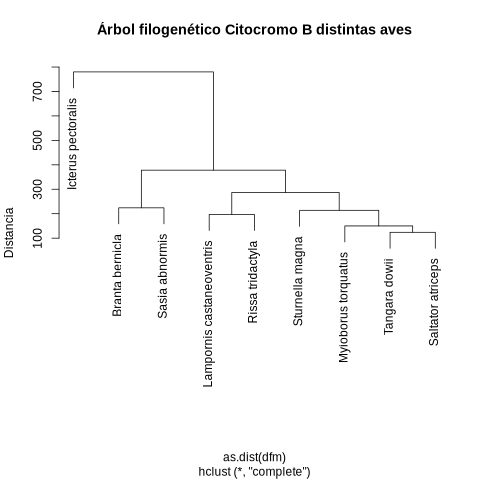

In [8]:
%%R -i dfm

plot(hclust(as.dist(dfm)), main="Árbol filogenético Citocromo B distintas aves", ylab='Distancia')

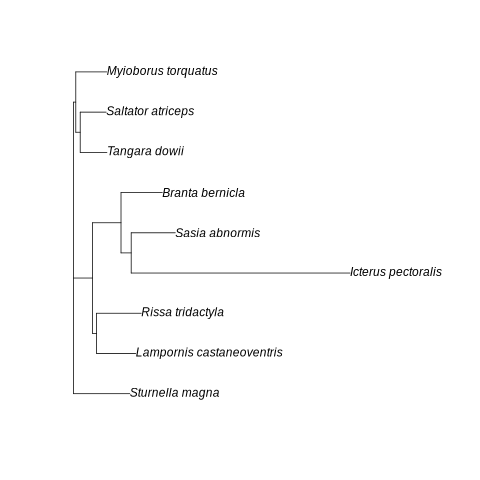

In [9]:
%%R -i dfm

library(ape)
arbol <- nj(as.dist(dfm)) 
plot(arbol)